# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
# Checking the number of mice.
len(merged_df["Mouse ID"].unique())

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mouse 

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_df = merged_df[merged_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
removed_duplicate_df = merged_df[merged_df["Mouse ID"] != "g989"]
removed_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Checking the number of mice in the clean DataFrame.
len(removed_duplicate_df["Mouse ID"].unique())

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ss_mean = removed_duplicate_df.groupby("Drug Regimen").mean(numeric_only=True)["Tumor Volume (mm3)"]
ss_median = removed_duplicate_df.groupby("Drug Regimen").median(numeric_only=True)["Tumor Volume (mm3)"]
ss_var = removed_duplicate_df.groupby("Drug Regimen").var(numeric_only=True)["Tumor Volume (mm3)"]
ss_std = removed_duplicate_df.groupby("Drug Regimen").std(numeric_only=True)["Tumor Volume (mm3)"]
ss_sem = removed_duplicate_df.groupby("Drug Regimen").sem(numeric_only=True)["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

sumstat_df = pd.DataFrame({
    "Mean": ss_mean,
    "Median": ss_median,
    "Varience": ss_var,
    "Standard Deviation": ss_std,
    "SEM": ss_sem
    
})

sumstat_df

,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = removed_duplicate_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df = pd.DataFrame({
    "Mean": summary_stats["mean"],
    "Median": summary_stats["median"],
    "Variance": summary_stats["var"],
    "Std Deviation": summary_stats["std"],
    "SEM": summary_stats["sem"]
})
summary_df

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regiment', ylabel='# of Mice Tested'>

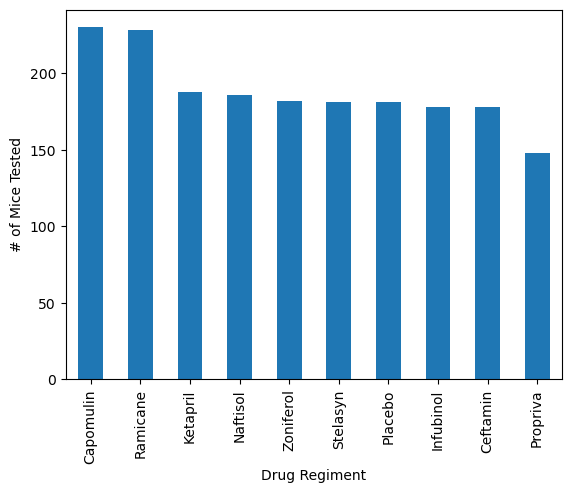

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_pandas = removed_duplicate_df["Drug Regimen"].value_counts()

total_pandas.plot(kind="bar", xlabel="Drug Regiment", ylabel="# of Mice Tested")

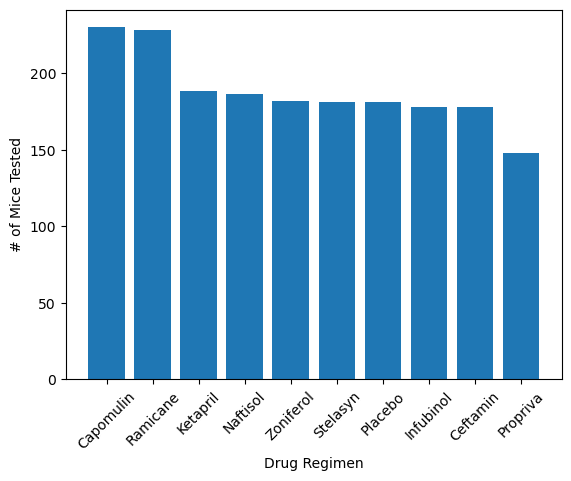

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_pyplot = removed_duplicate_df["Drug Regimen"].value_counts()
plt.bar(total_pyplot.index.values, total_pyplot.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("# of Mice Tested")
plt.show()

<Axes: ylabel='count'>

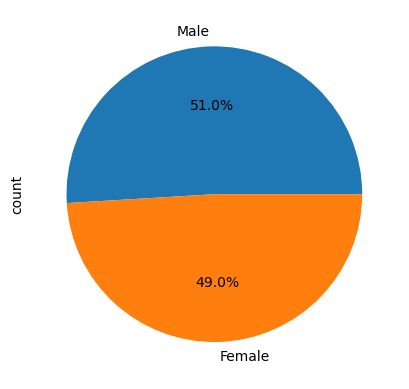

In [35]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data_pandas = removed_duplicate_df["Sex"].value_counts()

# Make the pie chart
gender_data_pandas.plot(kind="pie", autopct="%1.1f%%")

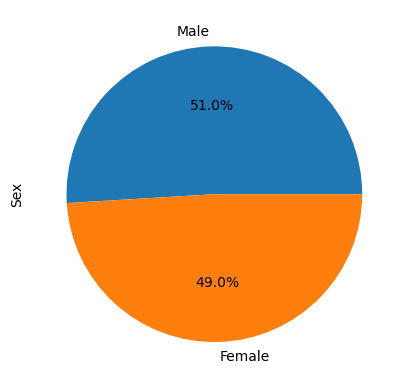

In [37]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data_pyplot = removed_duplicate_df["Sex"].value_counts()

# Make the pie chart
plt.pie(gender_data_pyplot, labels= gender_data_pyplot.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = removed_duplicate_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = max_tumor.merge(removed_duplicate_df, on=["Mouse ID","Timepoint"], how = "left")

In [42]:
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [44]:
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_list = []

for treat in treat_list:
    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == treat, "Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tumor_volume)
    quarts = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quarts[.25]
    upperq = quarts[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lowerbound) | (final_tumor_volume > upperbound)]
    print(f"{treat}'s potential outliers are {outliers}")

Capomulin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treat in treat_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == treat, "Tumor Volume (mm3)"]


    # add subset
    tumor_vol_list.append(final_tumor_volume)


    # Determine outliers using upper and lower bounds
    quarts = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quarts[.25]
    upperq = quarts[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lowerbound) | (final_tumor_volume > upperbound)]
    print(f"{treat}'s potential outliers are {outliers}")

Capomulin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


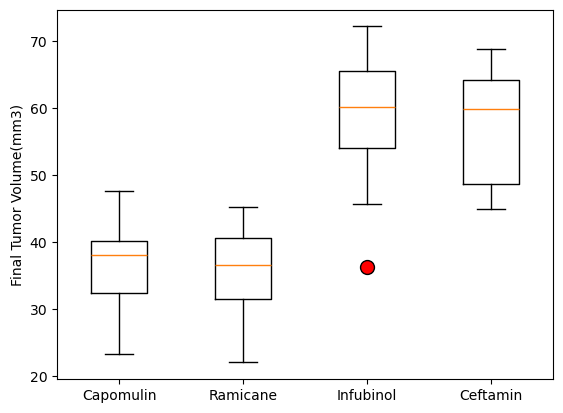

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
bp_variables = dict(markerfacecolor="red", markersize=10)
plt.boxplot(tumor_vol_list, labels = treat_list, flierprops=bp_variables)
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

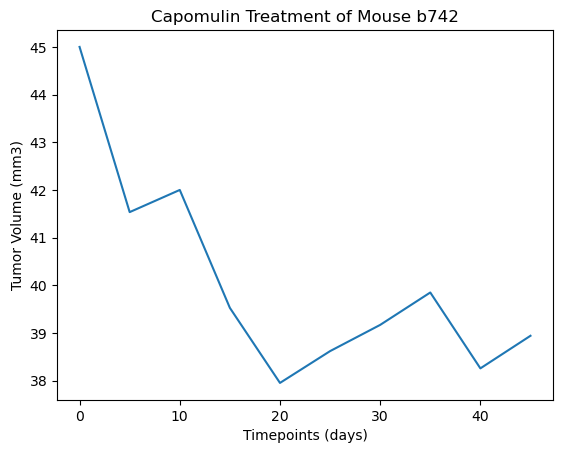

In [50]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo = removed_duplicate_df[removed_duplicate_df["Drug Regimen"] == "Capomulin"]
mousedata = capo[capo["Mouse ID"] == "b742"]

plt.plot(mousedata["Timepoint"], mousedata["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoints (days)")
plt.title("Capomulin Treatment of Mouse b742")
plt.show()

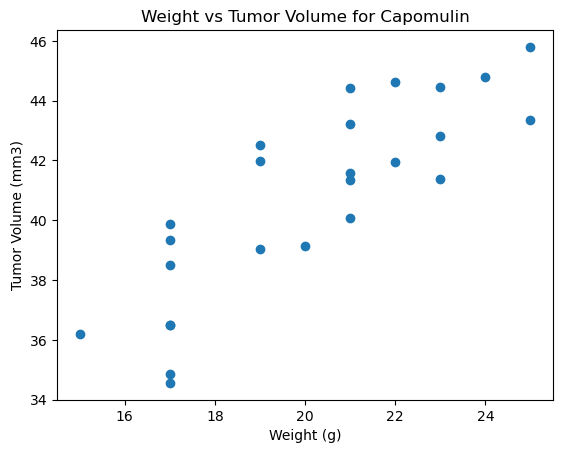

In [110]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo = removed_duplicate_df[removed_duplicate_df["Drug Regimen"] == "Capomulin"]
capo_mean = capo.groupby(["Mouse ID"]).mean(numeric_only=True)
capo_weight = capo_mean["Weight (g)"]
capo_tumvol = capo_mean["Tumor Volume (mm3)"]

plt.scatter(capo_weight, capo_tumvol)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


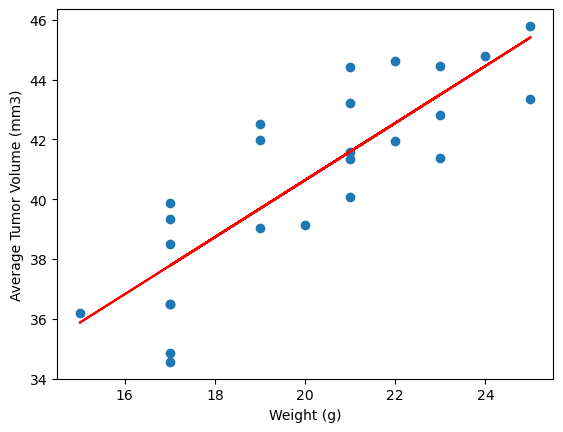

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
